# An example of one-variable linear regression
Code by [karbon](https://github.com/csy-tvgo)

Dataset from [Machine Learning](https://www.coursera.org/learn/machine-learning) exercise 1 by Andrew Ng.

## Import packages

In [1]:
%matplotlib inline
import numpy as np
import csv
import matplotlib.pyplot as plt
import random

## Load trainset from csv file

In [2]:
# Declare lists for storing trainset of population and profit
population = np.array([])
profit = np.array([])

# Load trainset from csv file
reader = csv.reader(open('D:\\升学\\机器学习\\Brief Introduction to AI\\Brief Introduction to AI\\code\\dataForCEO.csv','r'))
for row in reader:
    population = np.append(population, float(row[0]))
    profit = np.append(profit, float(row[1]))

In [3]:
print(str(population))
print(str(profit))

[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]
[17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263    5.1875
  

## Plot trainset

In [4]:
def plotData(x, y, t0=None, t1=None):
    plt.figure(figsize=(6,4))
    plt.scatter(x.tolist(), y.tolist(), marker='x') # maker: 散点的形状   x.tolist(): 将矩阵作为列表返回
    if (t0 != None) and (t1 != None):
        tempx = np.linspace(5, 22.5, 50)  # numpy.linspace(start,stop,num=50,endpoint=True,retstep=False,dtype=None) 在指定的间隔内返回均匀间隔的数字
        tempy = t0 + tempx * t1
        plt.plot(tempx, tempy, color='red', linestyle='--')
    plt.xlabel('Population of City in 10000')
    plt.ylabel('Profit in $10000')
    plt.show()

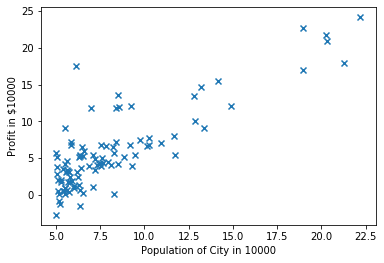

In [5]:
plotData(population, profit)

## Model definiation of linear regression
Our model of one-variable linear regression is 
$$ h(x)=\theta_0 + \theta_1 x $$

In [6]:
def h(x, theta0, theta1):
    return theta0 + theta1 * x

Cost function is
$$ J(\theta_0 ,\theta_1)=\frac{1}{2m} \sum^{m}_{i=1}{(h(x_i)-y_i)^2}  $$
$$ =\frac{1}{2m} \sum^{m}_{i=1}{(\theta_0+\theta_1 x_i-y_i)^2}  $$


In [7]:
def computeCost(x, y, theta0, theta1):
    m = len(y)
    J = 1/(2*m) * sum((h(x,theta0,theta1) - y) ** 2)
    return J

One iteration of gradient descent is

In [8]:
def gradientDescent(x, y, theta0, theta1, alpha, iterTimes):
    m = len(y)
    temp0 = theta0 - alpha*(1/m) * sum((h(x, theta0, theta1) - y));  
    temp1 = theta1 - alpha*(1/m) * sum((h(x, theta0, theta1) - y) * x);  
    iterTimes = iterTimes + 1
    return temp0, temp1, iterTimes

## Model Fitting
Initialize $\theta_0,\theta_1$ with random float from -10 to 10,

Learning rate $\alpha$ is set to 0.01

In [9]:
theta0 = random.uniform(-10,10)
theta1 = random.uniform(-10,10)
alpha = 0.01
iterTimes = 0 # times of iteration

See the initial model

After 0 iterations:
h(x) = 4.325681 + 5.824204x
Cost is 1221.922660 now.


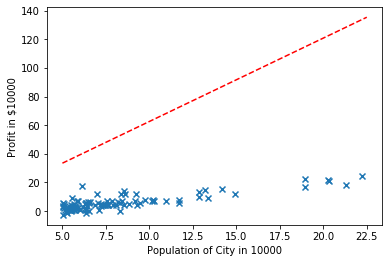

In [10]:
print("After %d iterations:"%(iterTimes))
print("h(x) = %f + %fx"%((theta0, theta1)))  
print("Cost is %f now."%(computeCost(population, profit, theta0, theta1)))
plotData(population, profit, theta0, theta1)

Start fitting.

You can run the below cell repeatly to observe the process.

One time of running means 10 iterations.

After 2590 iterations:
h(x) = -3.824025 + 1.185825x
Cost is 4.477440 now.


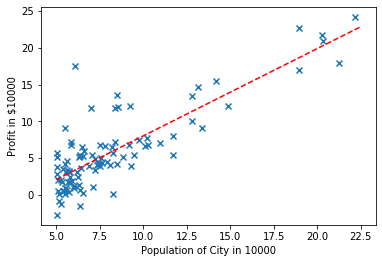

In [62]:
for i in range(1000):
    theta0, theta1, iterTimes = gradientDescent(population, profit, theta0, theta1, alpha, iterTimes)
print("After %d iterations:"%(iterTimes))
print("h(x) = %f + %fx"%((theta0, theta1)))  
print("Cost is %f now."%(computeCost(population, profit, theta0, theta1)))
plotData(population, profit, theta0, theta1)

### Dear CEO, after many times of iterations, you can estimate your profit in a new city through the red line in the figure above.